# Task 1 : Iris Flowers Classification ML Project

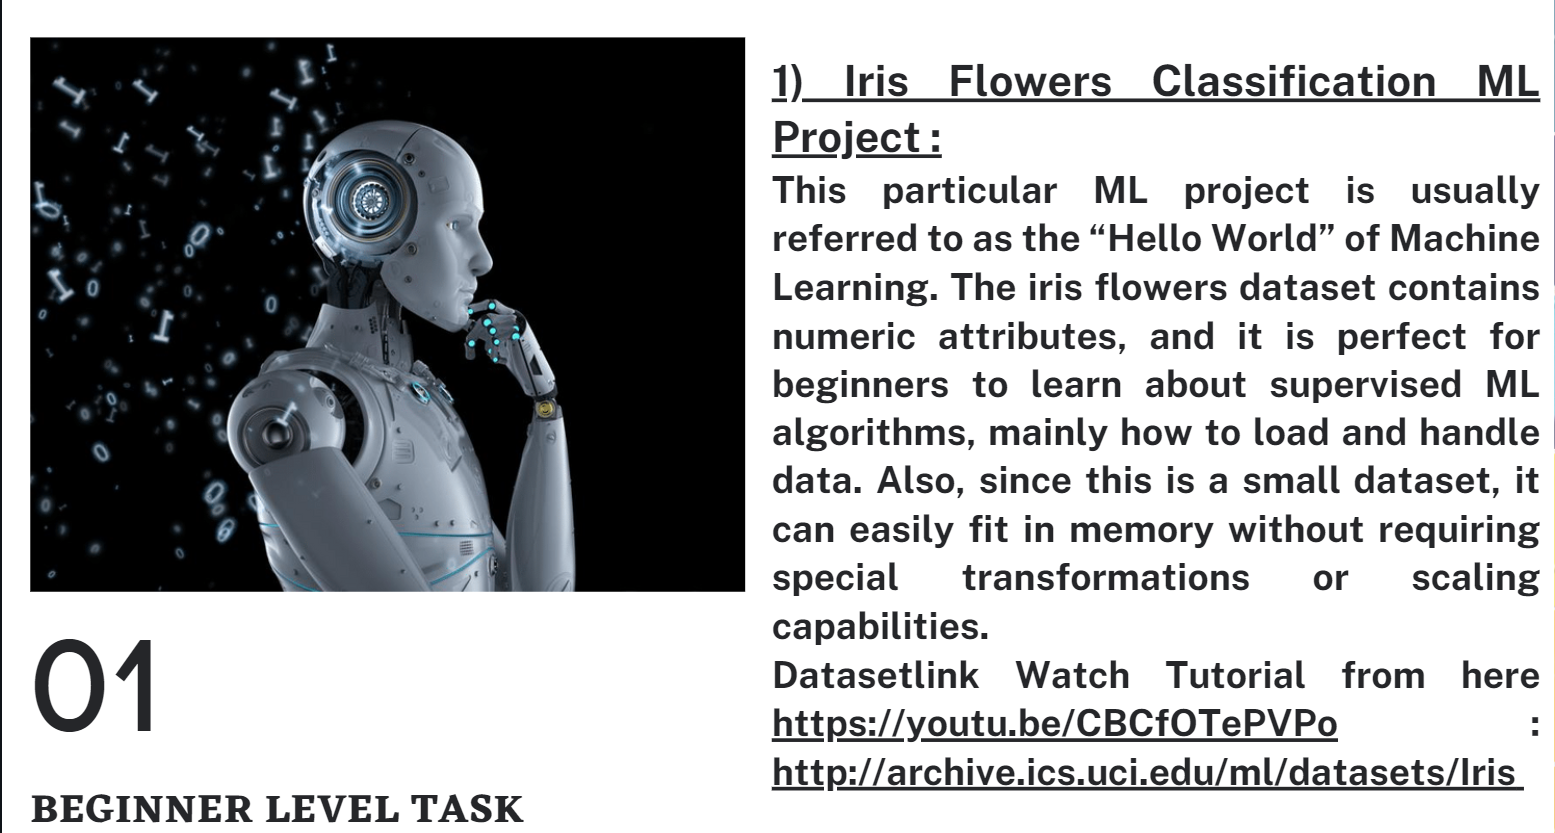

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
iris_df =pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/iris.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris_df.shape

(150, 5)

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_df['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [7]:
iris_df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Data Visualization

<function matplotlib.pyplot.show(*args, **kw)>

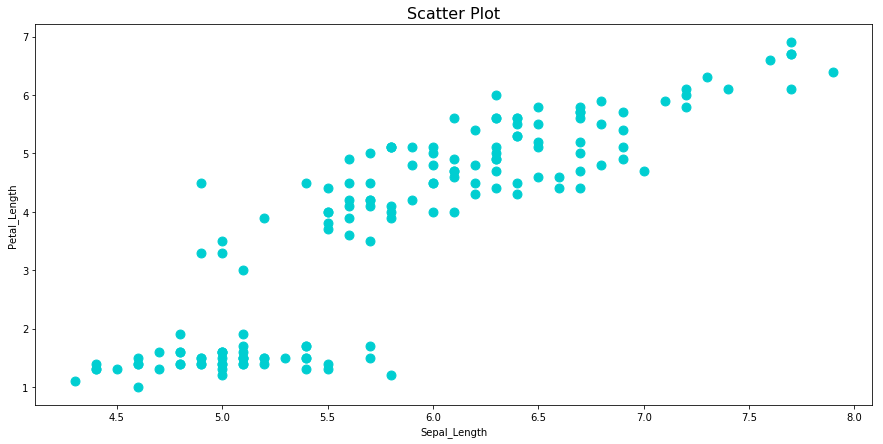

In [8]:
# Scatter Plot
plt.figure(figsize = (15,7))
plt.scatter(iris_df['sepal_length'], y = iris_df['petal_length'], color ='darkturquoise', s = 80)
plt.title('Scatter Plot', fontsize = 16)
plt.xlabel('Sepal_Length')
plt.ylabel('Petal_Length')
plt.show

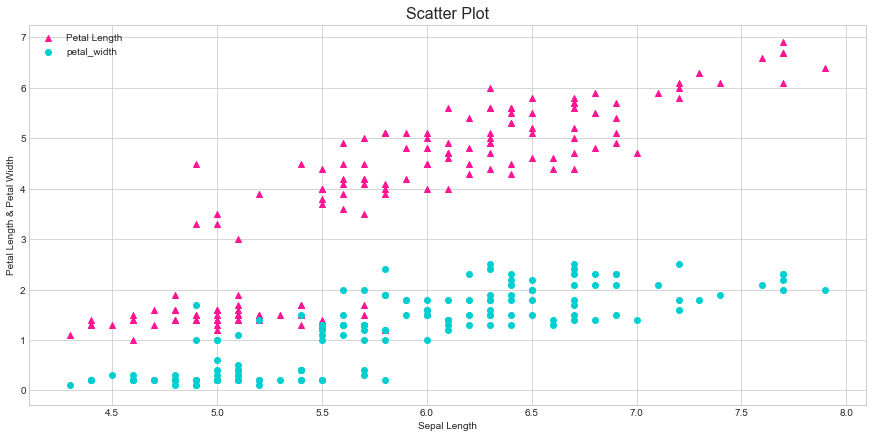

In [9]:
# Scatter Plot 
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (15,7))
plt.scatter(iris_df['sepal_length'], y = iris_df['petal_length'], c = 'deeppink', marker = '^', label = "Petal Length")
plt.scatter(iris_df['sepal_length'], y = iris_df['petal_width'], c = 'darkturquoise', Label = "Petal Width")
plt.title('Scatter Plot', fontsize = 16)
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length & Petal Width")
plt.legend()
plt.show()


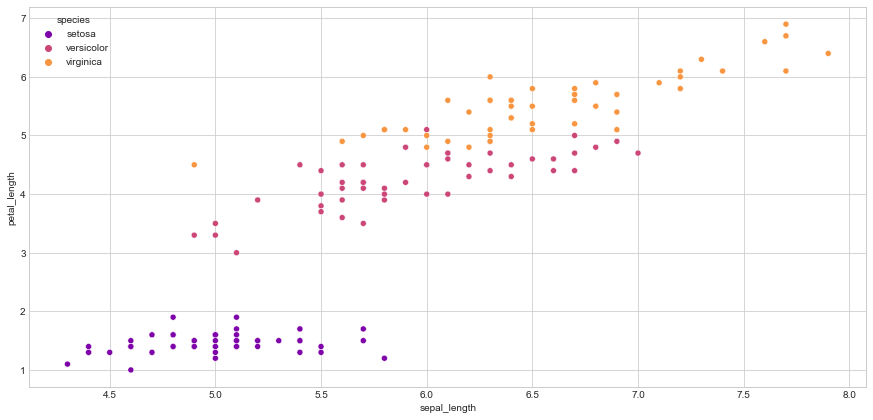

In [10]:
# Seaborn - Scatter Plot
sns.set_style('whitegrid')
plt.figure(figsize = (15,7))
sns.scatterplot(x = 'sepal_length', y = 'petal_length', data = iris_df, hue = 'species', palette = 'plasma')
plt.show()

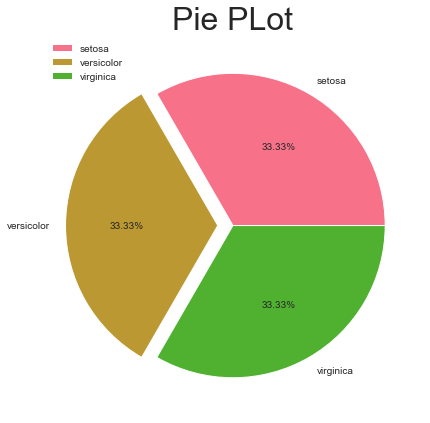

In [11]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (15,7))
plt.pie(iris_df['species'].value_counts(), autopct = '%0.2f%%', labels = iris_df['species'].unique(), explode = (0,0.1,0))
plt.title('Pie PLot' ,fontsize = 32)
plt.legend()
plt.show()

c:\users\analy\miniconda3\envs\vobject\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\analy\miniconda3\envs\vobject\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


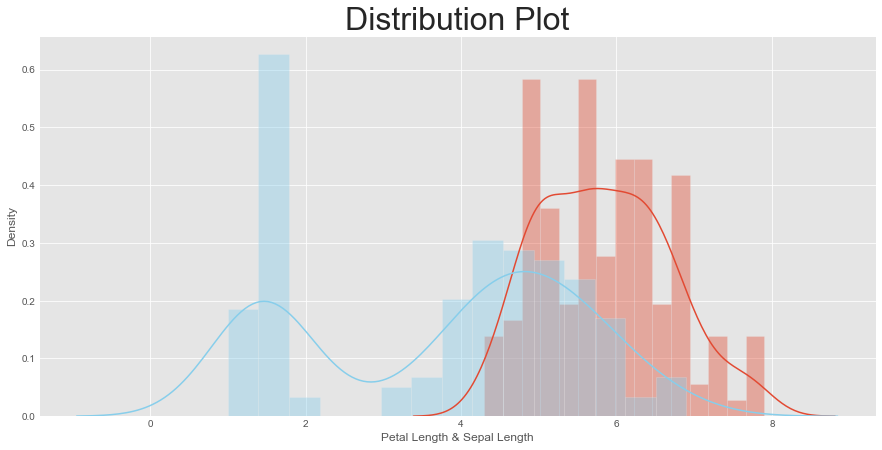

In [12]:
plt.style.use('ggplot')
plt.figure(figsize = (15,7))
sns.distplot(iris_df['sepal_length'], bins = 15)
sns.distplot(iris_df['petal_length'], bins = 15, color = 'skyblue')
plt.title("Distribution Plot", fontsize = 32)
plt.xlabel('Petal Length & Sepal Length')
plt.ylabel('Density')
plt.show()

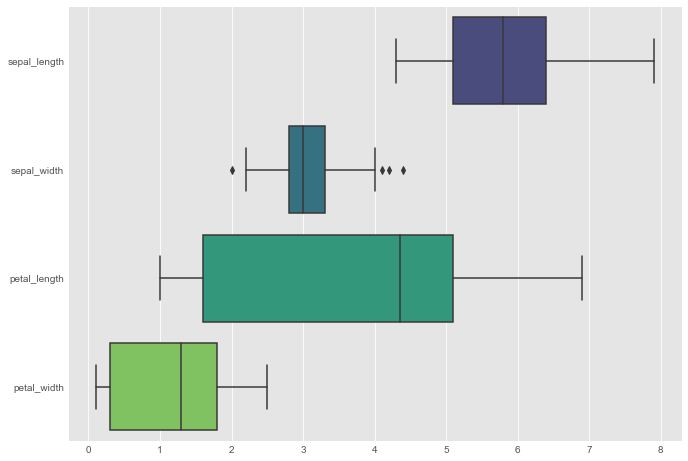

In [13]:
# Box Plot
plt.style.use('ggplot')
plt.figure(figsize = (11,8))
sns.boxplot(data = iris_df, orient = 'h', palette = 'viridis')


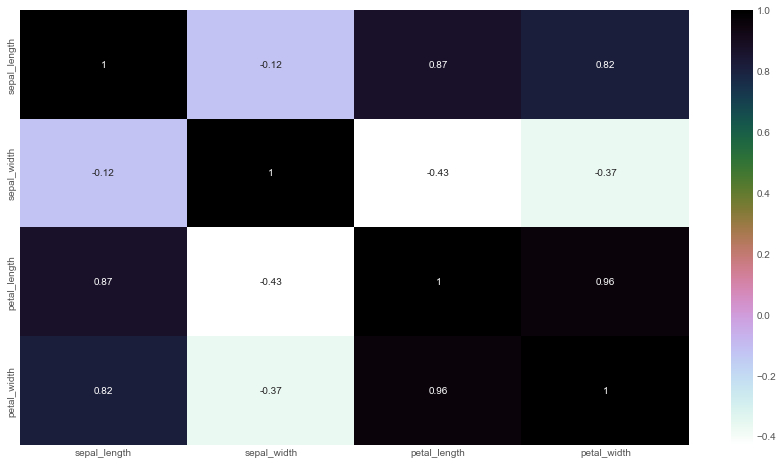

In [14]:
# HeatMap
plt.figure(figsize = (15,8))
sns.heatmap(iris_df.corr(), annot = True, cmap = 'cubehelix_r')
plt.show()

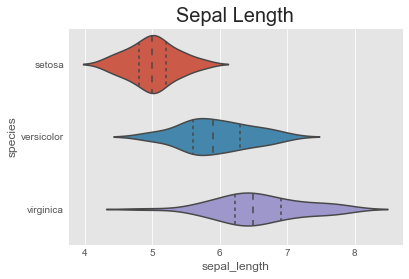

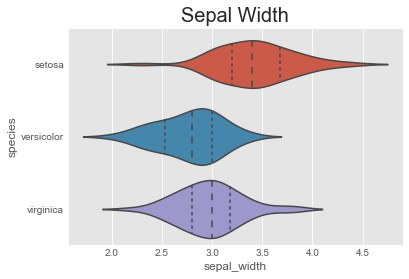

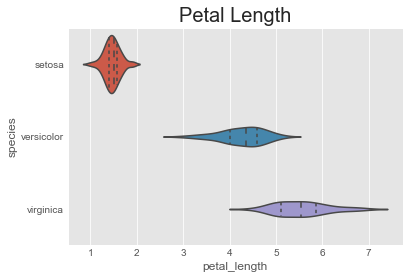

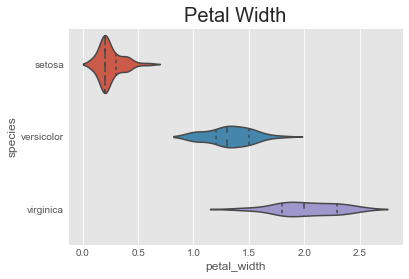

In [15]:
# Violin Plot
sns.violinplot(y = 'species', x = 'sepal_length', data = iris_df, inner = 'quartile')
plt.title("Sepal Length", fontsize = 20)
plt.show()
sns.violinplot(y = 'species', x = 'sepal_width', data = iris_df, inner = 'quartile')
plt.title("Sepal Width", fontsize = 20)
plt.show()
sns.violinplot(y = 'species', x = 'petal_length', data = iris_df, inner = 'quartile')
plt.title("Petal Length", fontsize = 20)
plt.show()
sns.violinplot(y = 'species', x = 'petal_width', data = iris_df, inner = 'quartile')
plt.title("Petal Width", fontsize = 20)
plt.show()

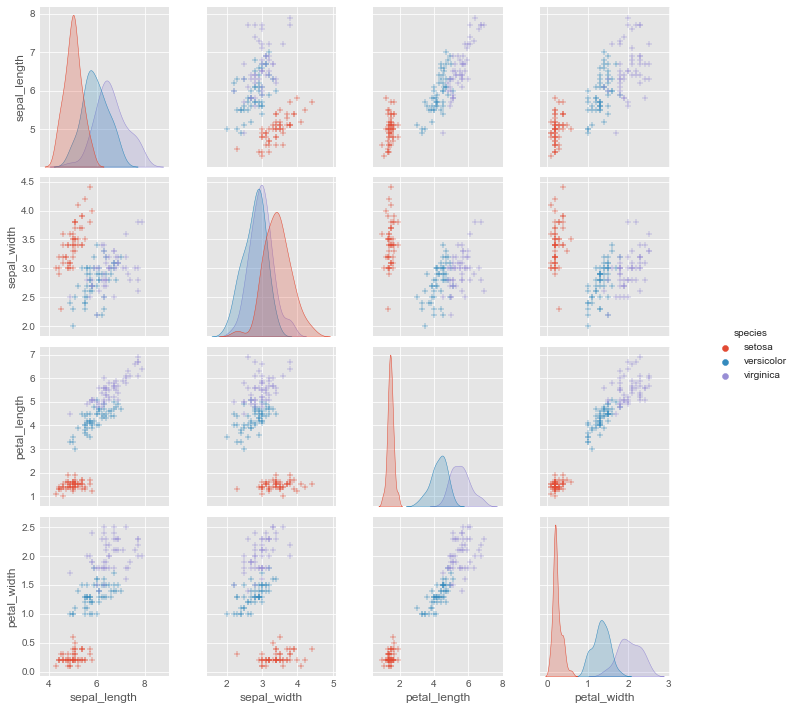

In [16]:
# PairPlot
sns.pairplot(iris_df, hue = 'species', markers = '+')
plt.show()

## Model Building

In [17]:
x = iris_df.drop(['species'], axis = 1)
y= iris_df['species']
print(f'x shape: {x.shape} | y shape: {y.shape}')

x shape: (150, 4) | y shape: (150,)


In [18]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 1)

In [19]:
# Model Creation
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))
# evaluate each model in turn
results = []
model_names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    model_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

c:\users\analy\miniconda3\envs\vobject\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\analy\miniconda3\envs\vobject\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\analy\miniconda3\envs\vobject\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\analy\miniconda3\envs\vobject\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\analy\miniconda3\envs\vobject\lib\site-pa

LR: 0.955909 (0.044337)
LDA: 0.975641 (0.037246)
KNN: 0.950524 (0.040563)
CART: 0.966550 (0.041087)
NB: 0.951166 (0.052812)
SVC: 0.983333 (0.033333)


In [20]:
model = SVC(gamma = 'auto')
model.fit(x_train, y_train)
prediction = model.predict(x_test)
prediction

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

In [21]:
print(f'Test Accuracy: {accuracy_score(y_test, prediction)}')
print(f'Classification Report: \n {classification_report(y_test, prediction)}')


Test Accuracy: 0.9666666666666667
Classification Report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

   micro avg       0.97      0.97      0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

